# Module 6 Unit 3
## Use Python to perform K-means clustering to inform a business case

Insert your code after `# YOUR CODE HERE`.
**NOTE:** This notebook will not be graded, but you should submit it when you submit your assignment, so that the Tutor Team can see how you arrived at your answers.


In [1]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import seaborn as sns
import numpy as np

In [2]:
# Import data
df = pd.read_csv("online_shoppers_intention.csv",delimiter=",")

# Remove NaN
nr_samples_before = df.shape[0]
df = df.dropna()
print('Removed %s samples' % (nr_samples_before - df.shape[0]))

# Size of the data set after removing NaN
print(df.shape)

Removed 14 samples
(12316, 18)


In [3]:
# Explore type of data and feature names
df.sample(8)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
7850,4.0,100.60,2.0,5.0,93.0,2002.760000,0.008163,0.026599,0.000000,0.0,Sep,2,2,3,13,Returning_Visitor,False,False
7400,7.0,194.40,0.0,0.0,5.0,46.200000,0.012500,0.037500,0.000000,0.0,Jul,2,2,4,5,New_Visitor,False,False
9378,6.0,71.20,0.0,0.0,101.0,3800.089234,0.003883,0.024032,3.179064,0.0,Nov,1,1,3,1,Returning_Visitor,False,True
5226,2.0,114.00,0.0,0.0,11.0,427.000000,0.014286,0.042857,39.420000,0.0,May,2,2,1,2,Returning_Visitor,False,False
8342,0.0,0.00,0.0,0.0,7.0,271.500000,0.000000,0.028571,0.000000,0.0,Nov,8,2,3,2,Returning_Visitor,False,False
4192,0.0,0.00,0.0,0.0,7.0,98.333333,0.028571,0.032653,0.000000,0.0,May,1,1,1,3,Returning_Visitor,False,False
2907,5.0,85.00,0.0,0.0,24.0,567.450000,0.040000,0.058667,0.000000,1.0,May,3,2,3,1,Returning_Visitor,True,False
11367,8.0,213.75,2.0,45.5,30.0,2054.841667,0.000000,0.001042,21.964624,0.0,Dec,1,1,6,2,New_Visitor,False,True


In [4]:
# Select continuous variables for clustering
X = df.iloc[:, 0:10]
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0


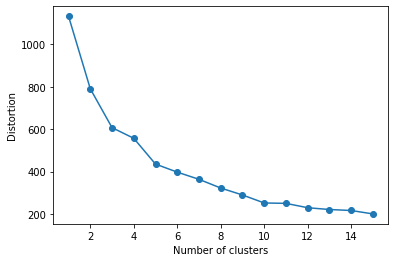

In [5]:
# Find optimal number of clusters

# 1. Elbow method
# Calculate distortions
distortions = []
# YOUR CODE HERE
for i in range(1, 16):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10,
               max_iter=300, tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(sum(np.min(cdist(X, km.cluster_centers_,
                      'euclidean'),axis=1)) / X.shape[0])

# Plot distortions
plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

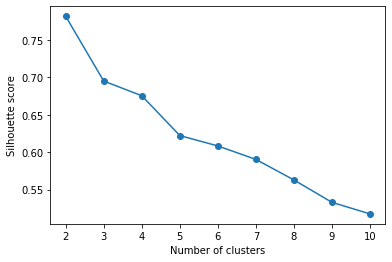

In [6]:
# 2. Silhouette method
sil = []
kmax = 10
# YOUR CODE HERE
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric='euclidean'))

# Plot
plt.plot(range(2, kmax+1), sil, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Use the output from the elbow or silhouette method to decide how many clusters to use.

In [7]:
# Cluster the data
# Hint: km = KMeans(....) and use init='kmeans++' 
# YOUR CODE HERE
km = KMeans(n_clusters=2, init='k-means++',
           n_init=10, max_iter=300,
           tol=1e-04, random_state=0)
#Decided to use Silhouette first as elbow is less imperical, harder to ascertain exactly
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [8]:
# Check how many observations are in each cluster
# YOUR CODE HERE

#First couple of labels
print("First few cluster labels:", km.labels_[:65])

#Overall shape/size of each cluster
print("Cluster 0 size: %s \nCluster 1 size: %s"
     % (len(km.labels_) - km.labels_.sum(), km.labels_.sum()))

First few cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Cluster 0 size: 11383 
Cluster 1 size: 933


In [9]:
# Set up a dataframe with cluster allocations
# YOUR CODE HERE
Xnew = X.copy()
Xnew["CLUSTERS"] = km.labels_
Xnew.sample(8, random_state=0)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,CLUSTERS
8362,0.0,0.000000,0.0,0.0,26.0,532.000000,0.030769,0.044231,0.0,0.0,0
5400,0.0,0.000000,0.0,0.0,7.0,151.500000,0.000000,0.028571,0.0,0.8,0
1793,6.0,55.000000,1.0,7.0,132.0,4056.175369,0.005882,0.019283,0.0,0.0,1
7091,8.0,192.433333,2.0,53.4,45.0,1372.875238,0.004167,0.006250,0.0,0.0,0
5451,4.0,85.928571,0.0,0.0,39.0,681.761905,0.015385,0.032988,0.0,0.0,0
3995,2.0,139.000000,1.0,20.0,31.0,960.833333,0.007843,0.025000,0.0,0.0,0
9619,3.0,70.500000,0.0,0.0,44.0,737.181935,0.005581,0.023137,0.0,0.0,0
1776,3.0,62.000000,2.0,193.0,4.0,139.000000,0.000000,0.012500,0.0,0.0,0


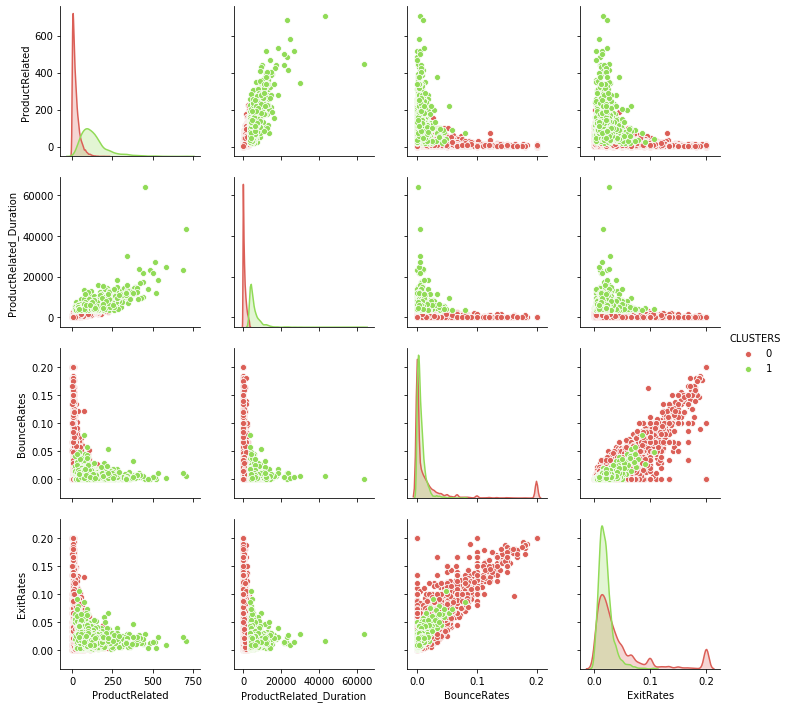

In [10]:
# Plot the following variables and their clusters
var = ['ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates']

# Plot using seaborn
# YOUR CODE HERE
sns.pairplot(Xnew, vars=var, hue="CLUSTERS", palette=sns.color_palette("hls", 4))

Continue to the activity submission to answer questions related to this notebook.